In [1]:
import pandas as pd

In [3]:

master_df = pd.read_csv('master_df.csv')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA


df_electric = master_df[master_df['Fuel Type'] == 'Electric']

columns_to_drop = ['Vehicle Class', 'Vehicle Make', 'Vehicle Model', 'Fuel Type',
                   'Cylinder Capacity Of Engine (c.c.)', 'Rated Power (kW)', 'Body Type',
                   'First Registration Vehicle Status (Note)',
                   'Permitted Gross Vehicle Weight ', 'Number Of Passenger Seats ',
                   'Taxable Value (HK$)']
print(df_electric.columns)

Index(['Vehicle Class', 'Vehicle Make', 'Vehicle Model', 'Fuel Type',
       'Cylinder Capacity Of Engine (c.c.)', 'Rated Power (kW)', 'Body Type',
       'First Registration Vehicle Status (Note)',
       'Permitted Gross Vehicle Weight ', 'Number Of Passenger Seats ',
       'Taxable Value (HK$)', 'Year Of Manufacture'],
      dtype='object')


Current data:
2017: 2
2018: 6
2019: 2
2020: 3
2021: 4
2022: 68
2023: 2203


<Figure size 1200x600 with 0 Axes>

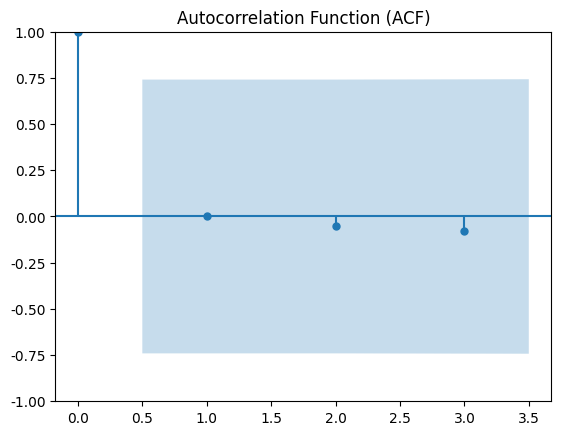

<Figure size 1200x600 with 0 Axes>

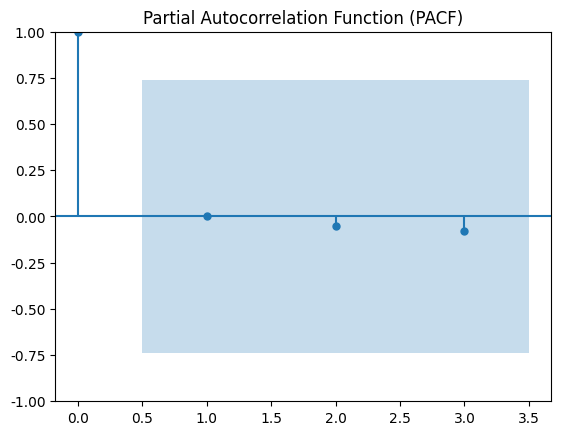

c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                    7
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -101.476
Date:                Fri, 18 Oct 2024   AIC                            214.952
Time:                        12:25:28   BIC                            213.702
Sample:                    12-31-2017   HQIC                           209.950
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          3.9278     42.468      0.092      0.926     -79.307      87.163
ar.L2         -5.8265     83.600     -0.070      0.944    -169.680     158.027
ar.L3          3.8685     41.374      0.093      0.9

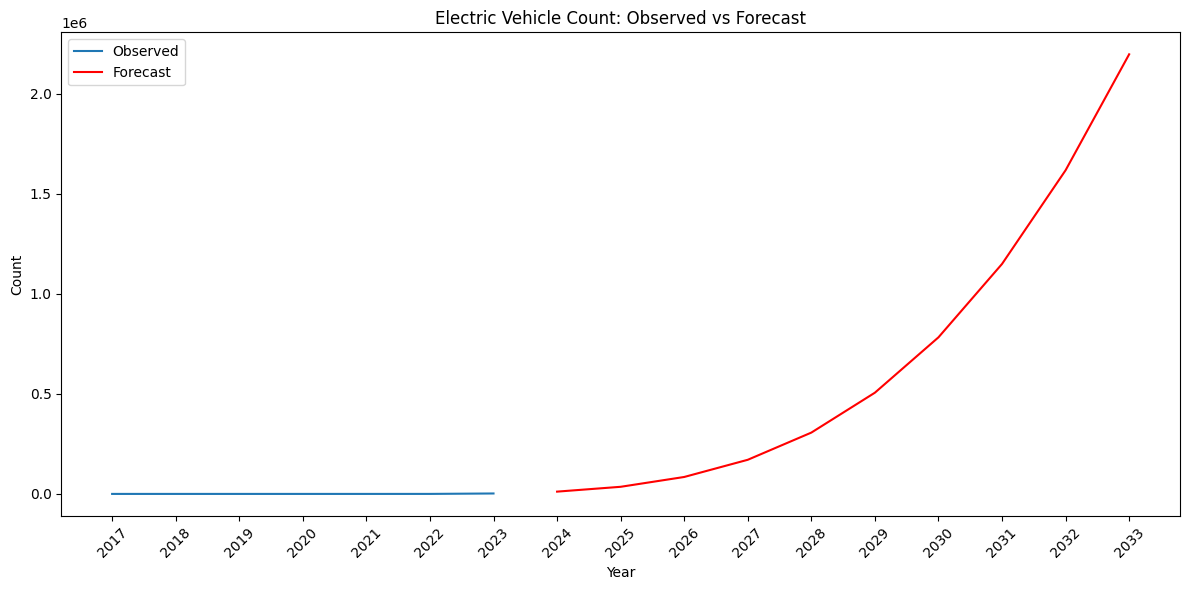


Forecast for the next 10 years:
2024: 11452 (Increase: 419.81%)
2025: 35585 (Increase: 210.74%)
2026: 84684 (Increase: 137.98%)
2027: 170630 (Increase: 101.49%)
2028: 306518 (Increase: 79.64%)
2029: 506023 (Increase: 65.09%)
2030: 782743 (Increase: 54.69%)
2031: 1149548 (Increase: 46.86%)
2032: 1617955 (Increase: 40.75%)
2033: 2197566 (Increase: 35.82%)

Total increase over 10 years: 99653.34%


C:\Users\User\AppData\Local\Temp\ipykernel_3276\4039415519.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_increase_percent = (forecast[-1] - df_electric.iloc[-1]) / df_electric.iloc[-1] * 100


In [6]:
df_electric = df_electric.drop(columns=columns_to_drop)

df_electric.set_index('Year Of Manufacture', inplace=True)

df_electric.index = pd.to_datetime(df_electric.index, format='%Y')
df_electric.index = df_electric.index.to_period('Y')
df_electric.sort_index(inplace=True)


df_electric = df_electric.groupby(df_electric.index).size().rename('Count')

print("Current data:")
for year, count in df_electric.items():
    print(f"{year}: {count}")

plt.figure(figsize=(12, 6))
plot_acf(df_electric)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_electric, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

model = ARIMA(df_electric, order=(4,1,1))
model_fit = model.fit()


print(model_fit.summary())

forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df_electric.index.astype(str), df_electric.values, label='Observed')
forecast_index = pd.period_range(start=df_electric.index[-1] + 1, periods=forecast_steps, freq='Y')
plt.plot(forecast_index.astype(str), forecast, color='red', label='Forecast')
plt.title('Electric Vehicle Count: Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nForecast for the next 10 years:")
last_observed = df_electric.iloc[-1]
for year, value in zip(forecast_index.astype(str), forecast):
    increase_percent = (value - last_observed) / last_observed * 100
    print(f"{year}: {value:.0f} (Increase: {increase_percent:.2f}%)")
    last_observed = value

total_increase_percent = (forecast[-1] - df_electric.iloc[-1]) / df_electric.iloc[-1] * 100
print(f"\nTotal increase over 10 years: {total_increase_percent:.2f}%")